In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Asignments_DS/forestfires.csv')
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


In [3]:
df.head(10)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
5,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small
6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small
7,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small
8,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,small
9,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,small


In [4]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,0.143133,0.162476,0.183752,0.117988,0.123791,0.104449,0.017408,0.355899,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,0.350548,0.369244,0.387657,0.322907,0.329662,0.306138,0.130913,0.479249,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.isnull().value_counts()

month  day    FFMC   DMC    DC     ISI    temp   RH     wind   rain   area   dayfri  daymon  daysat  daysun  daythu  daytue  daywed  monthapr  monthaug  monthdec  monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  monthsep  size_category
False  False  False  False  False  False  False  False  False  False  False  False   False   False   False   False   False   False   False     False     False     False     False     False     False     False     False     False     False     False     False            517
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [7]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [8]:
df.columns.value_counts()

daysun           1
monthnov         1
ISI              1
DC               1
daymon           1
wind             1
temp             1
area             1
rain             1
RH               1
month            1
daywed           1
daytue           1
monthoct         1
monthdec         1
dayfri           1
monthjan         1
monthmar         1
size_category    1
monthsep         1
monthaug         1
monthjul         1
day              1
monthfeb         1
monthjun         1
monthapr         1
monthmay         1
daysat           1
FFMC             1
DMC              1
daythu           1
dtype: int64

As we can see , there are so many columns so it would be nice idea to do the PCA or feature Engineering

In [9]:
#Scaling the data (leaving out the target variable, and the taking only the numerical data for input)
df1= df.iloc[:,2:30]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(df1)
df_norm = sc.transform(df1)
df_norm #Normalised dataset

array([[-8.05959472e-01, -1.32332557e+00, -1.83047676e+00, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-8.10203395e-03, -1.17954077e+00,  4.88890915e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       [-8.10203395e-03, -1.04982188e+00,  5.60715454e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       ...,
       [-1.64008316e+00, -8.46647711e-01,  4.74768113e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [ 6.80956663e-01,  5.49002541e-01,  2.69382214e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-2.02087875e+00, -1.68591332e+00, -1.78044169e+00, ...,
         2.27156334e+01, -1.72859706e-01, -7.06081245e-01]])

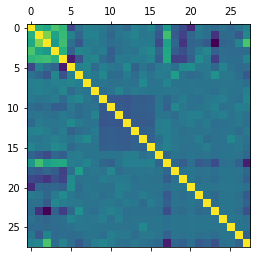

In [10]:
plt.matshow(df.corr())
plt.show()

In [11]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.019306,-0.059396,-0.019637,-0.089517,0.071730,0.011225,0.093908,-0.117199,0.228103,-0.137044,-0.281535,-0.454771,0.031833,-0.040634,-0.074327,-0.037230,-0.088964,-0.005998,0.076609
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.012010,-0.107921,-0.003653,0.025355,0.087672,0.000016,0.017939,-0.197543,0.497928,-0.176301,-0.317899,-0.105647,-0.001946,-0.050403,-0.407404,-0.081980,-0.074218,-0.187632,0.110907
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.004220,-0.052993,-0.035189,-0.001431,0.051859,0.028368,0.024803,-0.268211,0.279361,-0.105642,-0.399277,-0.115064,-0.100887,-0.186183,-0.650427,-0.114209,-0.078380,0.093279,0.531857
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.046695,-0.158601,-0.038585,-0.003243,-0.022406,0.068610,0.125415,-0.106478,0.334639,-0.162322,-0.249777,-0.103588,0.020982,0.111516,-0.143520,-0.060493,-0.076559,-0.071154,-0.068877
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.071949,-0.136529,0.034899,0.014403,0.051432,0.035630,0.090580,-0.157051,0.351404,-0.329648,-0.320015,-0.146520,0.142588,0.051015,-0.341797,-0.045540,-0.053798,-0.053513,0.088006
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.064506,0.009376,-0.023869,0.136220,-0.123061,-0.014211,-0.087508,0.021235,0.054761,-0.047714,0.140430,0.170923,0.013185,0.009382,-0.089836,0.086822,-0.035885,-0.072334,-0.062596
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,0.118090,-0.063881,-0.063799,0.027981,-0.062553,0.053396,-0.019965,0.048266,0.028577,0.269702,-0.029431,-0.070245,-0.040645,0.012124,0.181433,0.015054,0.011864,-0.053850,-0.181476
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.004261,-0.029945,-0.032271,-0.017872,-0.026798,0.139311,-0.020744,-0.009752,0.093101,-0.009752,-0.014698,-0.004566,-0.013390,-0.013510,-0.020744,-0.004566,-0.003225,-0.012665,-0.051733
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000,-0.052911,-0.021206,0.087868,-0.020463,0.020121,-0.001333,-0.011452,-0.008280,-0.004187,0.001010,-0.020732,-0.012589,0.006149,-0.020314,-0.045596,0.006264,-0.008893,-0.016878,0.056573
dayfri,0.019306,-0.012010,-0.004220,0.046695,-0.071949,0.064506,0.118090,-0.004261,-0.052911,1.000000,-0.181293,-0.195372,-0.210462,-0.162237,-0.166728,-0.151487,-0.019140,-0.100837,-0.019140,0.046323,-0.027643,-0.048969,0.006000,0.036205,0.056423,-0.019527,-0.045585,0.107671


In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 28)
pca_values = pca.fit_transform(df_norm)
pca_values

array([[ 3.76670947e+00, -1.32025451e+00, -8.43971398e-01, ...,
        -6.53345819e-02, -6.05082538e-15, -1.58743875e-16],
       [ 3.90786263e-01,  8.31061522e-01, -1.10136513e+00, ...,
         3.42618601e-02, -2.67236885e-15, -6.92610536e-16],
       [ 6.90415596e-01,  1.17774562e+00, -1.22199841e+00, ...,
         2.63235187e-02,  5.92028990e-15,  8.36530871e-16],
       ...,
       [ 9.21634000e-01, -2.64543072e-01,  2.71921606e+00, ...,
        -2.97865814e-01, -6.98934052e-16,  4.03200598e-18],
       [-1.62054896e+00, -9.78838231e-01,  3.31987355e-01, ...,
         3.91949863e-02,  5.57925976e-16, -3.39227990e-17],
       [ 4.07590654e+00, -3.67440726e-01, -2.47151775e-01, ...,
        -2.50420726e-02,  6.17289277e-17, -8.31075187e-17]])

In [13]:
var = pca.explained_variance_ratio_
var

array([1.35522746e-01, 6.85788793e-02, 6.23572652e-02, 5.32713255e-02,
       4.75942360e-02, 4.68009902e-02, 4.37490015e-02, 4.28025164e-02,
       4.08875728e-02, 4.01633268e-02, 3.92926854e-02, 3.83232321e-02,
       3.64221503e-02, 3.63217289e-02, 3.57856782e-02, 3.50087806e-02,
       3.35447704e-02, 3.24777366e-02, 3.04490902e-02, 3.00246758e-02,
       2.37167400e-02, 2.08329788e-02, 1.18357869e-02, 8.88449559e-03,
       4.55347471e-03, 7.98135931e-04, 2.67271490e-32, 3.42850975e-33])

In [14]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([13.55, 20.41, 26.65, 31.98, 36.74, 41.42, 45.79, 50.07, 54.16,
       58.18, 62.11, 65.94, 69.58, 73.21, 76.79, 80.29, 83.64, 86.89,
       89.93, 92.93, 95.3 , 97.38, 98.56, 99.45, 99.91, 99.99, 99.99,
       99.99])

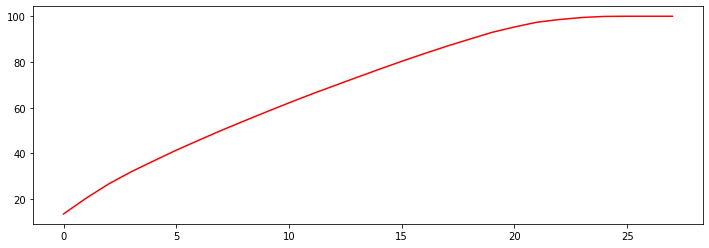

In [15]:
# Variance plot for PCA components obtained
plt.figure(figsize=(12,4))
plt.plot(var1,color="red");

In [16]:
#Selecting first 24 PCAs out of total 28
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:24],columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7',
                                                             'pc8','pc9','pc10','pc11','pc12','pc13','pc14',
                                                             'pc15','pc16','pc17','pc18','pc19','pc20','pc21',
                                                             'pc22','pc23','pc24']),
                     df[['size_category']]], axis = 1)
finalDf.size_category.replace(('large','small'),(1,0),inplace=True)
finalDf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24,size_category
0,3.766709,-1.320255,-0.843971,-1.994738,-1.453359,0.693985,0.308104,-0.019764,0.010161,-0.437314,-0.536738,1.234550,0.276198,-0.671216,-0.529599,-0.197543,-0.021839,0.688958,0.563603,-0.439596,-0.926619,-0.405425,-0.118719,-0.017933,0
1,0.390786,0.831062,-1.101365,1.400671,2.869388,0.965898,-2.795574,0.041095,-0.548879,0.104500,-2.876498,-0.568255,2.095225,1.417634,-0.879983,-2.503167,0.499649,0.563706,-0.703319,-1.535718,-0.892995,0.836590,0.204975,0.290771,0
2,0.690416,1.177746,-1.221998,2.442038,1.090630,0.390801,-1.586675,-2.159336,-0.090580,0.260888,-3.236229,-0.601439,1.998004,1.477351,-0.946682,-2.545144,-0.658411,-0.423618,0.860550,-1.195230,-0.297870,0.743648,0.081757,0.345915,0
3,3.359951,-1.161443,0.385728,-2.118328,-1.949601,1.027664,-0.179422,-0.250227,-0.620329,-1.343189,-0.145846,1.019492,0.576990,-0.752744,0.349346,-0.040887,0.017843,0.332572,1.164745,-1.632741,-0.817618,1.523710,-0.342302,-0.378420,0
4,2.974329,-0.842626,1.327788,0.038086,-1.124763,-0.574676,-0.777155,0.303635,0.861126,-2.024719,-0.467108,1.131879,-0.137990,-0.823316,0.402298,0.844431,1.014944,-0.618231,0.822853,-1.794109,-0.723371,2.020419,-0.545591,0.161735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,-0.087560,0.153964,1.241810,1.536581,0.372425,-1.133422,-0.362287,0.766946,0.818745,-0.289632,-0.933909,0.161275,-0.398215,0.197490,-0.801640,0.300522,0.513876,0.539642,-0.052958,1.898628,-1.441786,-0.821192,-1.205707,-0.698666,1
513,0.794366,-0.083966,2.670485,0.284995,0.223323,-0.904232,-0.014849,0.107226,1.340049,-0.147246,-0.652051,-0.132893,-0.518732,0.162358,-0.274733,0.342367,0.485571,0.580150,0.384984,0.086251,-0.970693,-1.353365,-1.254890,-1.212175,1
514,0.921634,-0.264543,2.719216,-0.019643,0.242195,-0.966939,-0.118080,0.123010,1.290364,-0.177553,-0.657663,-0.083060,-0.285899,0.062647,-0.494765,0.332816,0.344047,0.122409,0.313948,0.211157,-0.777731,-1.736711,-1.154127,-1.230040,1
515,-1.620549,-0.978838,0.331987,1.256638,-0.408164,0.735698,0.815510,-1.398344,0.076379,-0.005814,-0.503898,0.174276,-0.163149,0.246912,-0.147679,-0.011739,-1.035533,-0.774382,-0.216315,0.515791,0.080575,-0.055548,-0.067502,-0.311027,0


In [17]:

# split into input (X) and output (Y) variables
array = finalDf.values
X = array[:,0:24]
Y = array[:,24]

X.reshape(-1,1)
Y.reshape(-1,1)

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [19]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=24, activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [20]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
# Fit the model
model.fit(X, Y, validation_split=0.3, epochs=150, batch_size=10)

Epoch 1/150
37/37 [==============================] - 1s 17ms/step - loss: 0.6935 - accuracy: 0.5847 - val_loss: 0.6764 - val_accuracy: 0.6282
Epoch 2/150
37/37 [==============================] - 0s 2ms/step - loss: 0.6015 - accuracy: 0.7328 - val_loss: 0.6609 - val_accuracy: 0.6603
Epoch 3/150
37/37 [==============================] - 0s 2ms/step - loss: 0.5586 - accuracy: 0.7643 - val_loss: 0.6619 - val_accuracy: 0.6731
Epoch 4/150
37/37 [==============================] - 0s 2ms/step - loss: 0.5068 - accuracy: 0.8078 - val_loss: 0.6729 - val_accuracy: 0.6795
Epoch 5/150
37/37 [==============================] - 0s 2ms/step - loss: 0.5259 - accuracy: 0.7591 - val_loss: 0.6806 - val_accuracy: 0.6795
Epoch 6/150
37/37 [==============================] - 0s 2ms/step - loss: 0.4994 - accuracy: 0.7761 - val_loss: 0.6771 - val_accuracy: 0.6795
Epoch 7/150
37/37 [==============================] - 0s 2ms/step - loss: 0.4753 - accuracy: 0.7946 - val_loss: 0.6703 - val_accuracy: 0.6795
Epoch 8/150


In [22]:
# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 1ms/step - loss: 0.2991 - accuracy: 0.9458
accuracy: 94.58%
